<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing for Machine Learning
---

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

Please visit this great ressource : [Module Preprocessing from scikit-learn.org](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

## Objectives
- Understand the usefulness of **handling with missing values** and be able to apply it
- Understand the usefulness of data **encoding** and be able to apply it
- Understand the usefulness of data **scaling** and be able to apply it
- Practice on a dedicated exercice

In [ ]:
import numpy as np
import pandas as pd

## Handling with missing values
Missing values is a real-life matter when you want to perform some data analysis and modelisation.  
Many ML algorithms don't knwo how to deal with missing values.  
Then preprocessing is there to solve this matter with mainly 2 possibilities :
- Drop missing values
- Impute values to replace missing ones


### Drop missing values
Pandas has a `drop.na()` method for that.  
So first, let's generate data with missing value.

In [ ]:
data = pd.Series(data = [10, 12, 58, 0.1, np.nan, 125])
data

0     10.0
1     12.0
2     58.0
3      0.1
4      NaN
5    125.0
dtype: float64

We can check the presence of any missing value with `isna()` method.

In [ ]:
pd.isna(data)

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

Let's drop the missing value with the `drop.na()` method

In [ ]:
data.dropna()

0     10.0
1     12.0
2     58.0
3      0.1
5    125.0
dtype: float64

The last instruction doesn't alter the object named `data`.  
You need to specify the argument `inplace = True` for that.  
Check the documentation for other configuration : [Pandas drop Na](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [ ]:
data.dropna(inplace = True)
data

0     10.0
1     12.0
2     58.0
3      0.1
5    125.0
dtype: float64

### Impute values
Second statregy consists in imputation of values instead of missing values.

#### The `SimpleImputer()`
scikit-learn offers a way for completing missing values.  
Completion could be done with :
- `mean`, then replace missing values using the mean along each column. Can only be used with numeric data.
- `median`, then replace missing values using the median along each column. Can only be used with numeric data.
- `most_frequent`, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
- `constant`, then replace missing values with fill_value. Can be used with strings or numeric data.

Check the documentation for further explanation : [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer).

1. Declare your data and create an object from the class `SimpleImputer`

In [ ]:
data = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
data

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

2. Fit the `SimpleImputer()` on our data with `.fit()`

In [ ]:
imputer.fit(data)

SimpleImputer()

3. Transform data with imputation and with `.transform()`.

In [ ]:
imputer.transform(data)

array([[ 7.,  2.,  3.],
       [ 4.,  2.,  6.],
       [10.,  2.,  9.]])

Steps 2 & 3 could be directly done with `.fit_transform()`

In [ ]:
imputer.fit_transform(data)

array([[ 7.,  2.,  3.],
       [ 4.,  2.,  6.],
       [10.,  2.,  9.]])

#### The `KNNImputer()`
scikit-learn offers a way for completing missing values with `KNNImputer()`.  
The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.

Check the documentation for further explanation : [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer).

1. Declare your data and create an object from the class `KNNImputer`

In [ ]:
from sklearn.impute import KNNImputer
data = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)

2. Fit the `KNNImputer()` on our data with `.fit()`

In [ ]:
imputer.fit(data)

KNNImputer(n_neighbors=2)

3. Transform names into integer codes with `.transform()`

In [ ]:
imputer.transform(data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

Steps 2 & 3 could be directly done with `.fit_transform()`

In [ ]:
imputer.fit_transform(data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

#### More options

scikit-learn offers more sophisticated approach for completing missing.  

Check the guide for further explanation : [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation).


---


## Encode your data
Encoding is a part of preprocessing when we want to convert **qualitative** data into numerical one.  
See the great ressource [machinelearnia](https://www.youtube.com/watch?v=OGWwzm304Xs) [0 - 15 min] for more explanations.

### Method `LabelEncoder()`  
This method is useful for encoding data in a 1D shape, specially for y (target) variable.  
Check the documentation for further explanation : [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).


In [ ]:
from sklearn.preprocessing import LabelEncoder

1. Declare our data (names of Wilders) and create an object from the class `LabelEncoder`

In [ ]:
firstnames = np.array(['Rémi', 'Célia', 'Victorien', 'Silvain', 'Clara', 'Louis'])
label_encod = LabelEncoder()

2. Fit the `LabelEncoder()` on our data with `.fit()`

In [ ]:
label_encod.fit(firstnames)

LabelEncoder()

3. Transform names into integer codes with `.transform()`

In [ ]:
label_encod.transform(firstnames)

array([3, 1, 5, 4, 0, 2])

Steps 2 & 3 could be directly done with `.fit_transform()`

In [ ]:
label_encod.fit_transform(firstnames)

array([3, 1, 5, 4, 0, 2])

From now we could easliy come back to original data (names) with `.inverse_transform()`.

In [ ]:
# On known data
label_encod.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))

array(['Clara', 'Célia', 'Louis', 'Rémi', 'Silvain', 'Victorien'],
      dtype='<U9')

In [ ]:
# On unknown data
label_encod.inverse_transform(np.array([0, 1, 2, 3, 4, 5, 6]))

### Method `OrdinalEncoder()`  
This method is useful for encoding data in a 2D shape, specially for X (features) variables.  
Check the documentation for further explanation : [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder).

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

1. Declare our data (names of Wilders) and create an object from the class `OrdinalEncoder`

In [ ]:
names = np.array([
                  ['Rémi', 'Julien'],
                  ['Célia', 'Mato'],
                  ['Victorien', 'Flon-Beulin'],
                  ['Silvain', 'Lorand'],
                  ['Clara', 'Bustamante'],
                  ['Louis', 'Menou']
                  ])
ord_encod = OrdinalEncoder()

2. Fit the `OrdinalEncoder()` on our data with `.fit()`

In [ ]:
ord_encod.fit(names, )

OrdinalEncoder()

3. Transform names into integer codes with `.transform()`

In [ ]:
ord_encod.transform(names)

array([[3., 2.],
       [1., 4.],
       [5., 1.],
       [4., 3.],
       [0., 0.],
       [2., 5.]])

Steps 2 & 3 could be directly done with `.fit_transform()`

In [ ]:
ord_encod.fit_transform(names)

array([[3., 2.],
       [1., 4.],
       [5., 1.],
       [4., 3.],
       [0., 0.],
       [2., 5.]])

From now we could easly come back to original data (names) with `.inverse_transform()`

In [ ]:
# On known data
ord_encod.inverse_transform(np.array([[3., 2.],
                                      [1., 4.],
                                      [5., 1.],
                                      [4., 3.],
                                      [0., 0.],
                                      [2., 5.]]))

array([['Rémi', 'Julien'],
       ['Célia', 'Mato'],
       ['Victorien', 'Flon-Beulin'],
       ['Silvain', 'Lorand'],
       ['Clara', 'Bustamante'],
       ['Louis', 'Menou']], dtype=object)

In [ ]:
# On unknown data
ord_encod.inverse_transform(np.array([[6, 6]]))

**By the way, do you think it's acceptable to say Clara (0) < Louis (2) < Silvain (4) ???**

### Methods  `LabelBinarizer()`, `MultiLabelBinarizer()`, `OneHotEncoder()`  
These methods are useful for encoding data into codes 0 or 1 :
- `LabelBinarizer()` for data in a 1D shape, specially for y (target) variable.
- `MultiLabelBinarizer()` for data in a 1D shape, specially for y (target) variable.
- `OneHotEncoder()` for data in a 2D shape, specially for X (features) variables.

Check the documentation for further explanation : [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).


1. Ceate an object from the class `OneHotEncoder`

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encod = OneHotEncoder(sparse = False)

2. Fit & Transform our data with  `.fit_transform()`

In [ ]:
ohe_encod.fit_transform(names)

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

What does it means ??

In [ ]:
columns_names = np.array([np.sort(names[:,0].flatten()), np.sort(names[:,1].flatten())]).flatten()
columns_names

array(['Clara', 'Célia', 'Louis', 'Rémi', 'Silvain', 'Victorien',
       'Bustamante', 'Flon-Beulin', 'Julien', 'Lorand', 'Mato', 'Menou'],
      dtype='<U11')

In [ ]:
pd.DataFrame(data=ohe_encod.fit_transform(names), columns=columns_names)

,Clara,Célia,Louis,Rémi,Silvain,Victorien,Bustamante,Flon-Beulin,Julien,Lorand,Mato,Menou
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


From now we could easly come back to original data (names) with `.inverse_transform()`

In [ ]:
# On known data
ohe_encod.inverse_transform(np.array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]))

array([['Rémi', 'Julien'],
       ['Célia', 'Mato'],
       ['Victorien', 'Flon-Beulin'],
       ['Silvain', 'Lorand'],
       ['Clara', 'Bustamante'],
       ['Louis', 'Menou']], dtype=object)

In [ ]:
# On unknown data
ohe_encod.inverse_transform(np.array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]]))



---



---


## Normalise your data
Normalisation is another part of preprocessing when we want to scale our **quantitative** data on a same scale / basis.  
3 main methods are used :
- `MinMaxScaler()` : rescales the data set such that all feature values are in the range [0, 1]
- `StandardScaler` : removes the mean and scales the data to unit variance
- `RobustScaler` : removes the median and scales the data to unit quartile

More info about scaling and its different approaches : [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).
  
See the great ressource [machinelearnia](https://www.youtube.com/watch?v=OGWwzm304Xs) [15 - 29 min] for more explanation as well.

### Method `MinMaxScaler()`
Rescales the data set such that all feature values are in the range [0, 1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = np.array([[180], [200], [100]]) #Height of Obi-wan, Chewbacca and Yoda 
print("Data :", data.flatten())

mm_scaler = MinMaxScaler()
data_scale = mm_scaler.fit_transform(data)

print("Scaled data:", data_scale.flatten())

Data : [180 200 100]
Scaled data: [0.8 1.  0. ]


This method is sensitive to outliers

In [ ]:
data_outlier = np.array([[180], [2000], [100]])
print("Data outlier:", data_outlier.flatten())

mm_scaler = MinMaxScaler()
data_scale = mm_scaler.fit_transform(data_outlier)

print("Scaled data outlier:", data_scale.flatten())

Data outlier: [ 180 2000  100]
Scaled data outlier: [0.04210526 1.         0.        ]


### Method `StandardScaler()`
Removes the mean and scales the data to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

data = np.array([[180], [200], [100]])
print("Data :", data.flatten())

std_scaler = StandardScaler()
data_scale = std_scaler.fit_transform(data)

print("Scaled data:", data_scale.flatten())

Data : [180 200 100]
Scaled data: [ 0.46291005  0.9258201  -1.38873015]


This method is sensitive to outliers as well.

In [ ]:
data_outlier = np.array([[180], [2000], [100]]) 
print("Data outlier:", data_outlier.flatten())

std_scaler = StandardScaler()
data_scale = std_scaler.fit_transform(data_outlier)

print("Scaled data outlier:", data_scale.flatten())

Data outlier: [ 180 2000  100]
Scaled data outlier: [-0.66102858  1.41323351 -0.75220493]


### Method `RobustScaler()`
Removes the median and scales the data to unit quartile.

In [ ]:
from sklearn.preprocessing import RobustScaler

data = np.array([[180], [200], [100]])
print("Data :", data.flatten())

rob_scaler = RobustScaler()
data_scale = rob_scaler.fit_transform(data)

print("Scaled data:", data_scale.flatten())

Data : [180 200 100]
Scaled data: [ 0.   0.4 -1.6]


This method is much less sensitive to outliers.

In [ ]:
data_outlier = np.array([[180], [2000], [100]])
print("Data outlier:", data_outlier.flatten())

rob_scaler = RobustScaler()
data_scale = rob_scaler.fit_transform(data_outlier)

print("Scaled data outlier:", data_scale.flatten())

Data outlier: [ 180 2000  100]
Scaled data outlier: [ 0.          1.91578947 -0.08421053]


But particularly with more data ....

In [ ]:
data_outlier = np.array([[180], [2000], [100], [160], [192], [169], [183]]) 
print("Data outlier:", data_outlier.flatten())

rob_scaler = RobustScaler()
data_scale = rob_scaler.fit_transform(data_outlier)

print("Scaled data outlier:", data_scale.flatten())

Data outlier: [ 180 2000  100  160  192  169  183]
Scaled data outlier: [ 0.         79.13043478 -3.47826087 -0.86956522  0.52173913 -0.47826087
  0.13043478]


### Application of scaling on 2 series of data
Let's generate a first serie of data with numpy.

In [ ]:
data1 = np.random.normal(80, 6, 1000)
data1

Let's generate a second serie of data with different parameters.

In [ ]:
data2 = np.random.normal(40, 2, 1000)
data2

Let's scale the data.

In [ ]:
data1_scaled = StandardScaler().fit_transform(data1.reshape(-1, 1))
data2_scaled = StandardScaler().fit_transform(data2.reshape(-1, 1))

data1_scaled

Let's compare both data distributions : before and after scaling.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

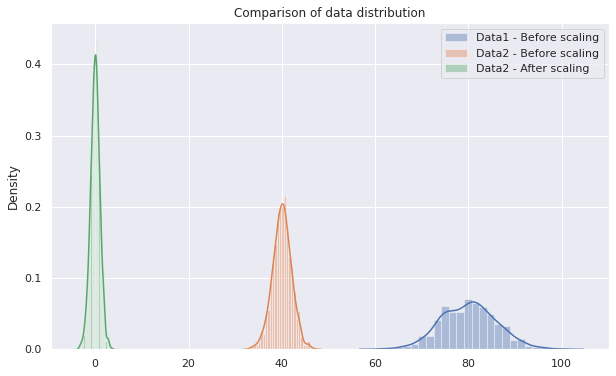

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(data1, label="Data1 - Before scaling")
sns.distplot(data1_scaled, label="Data1 - After scaling")
sns.distplot(data2, label="Data2 - Before scaling")
sns.distplot(data2_scaled, label="Data2 - After scaling")
plt.title("Comparison of data distribution")
plt.legend()

**Ok ,what do you think about the process of scaling ???**

## Exercices

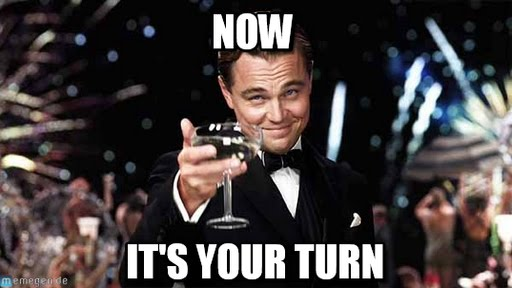


The goal of this exercice is to :
- Use the following ML script that provides a process to predict the genre of a song [spotify playlist].
- Apply full preprocessing on all data (numerical & categorical) to reach the best accuracy score.

**Let's compete to the ML challenge!** 💪


In [ ]:
# Load data
import pandas as pd
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

# Train test split
from sklearn.model_selection import train_test_split
y= df_music['genre']
X = df_music.select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Fit and predict : KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

# Score of models
from sklearn.metrics import accuracy_score
knn_score = accuracy_score(y_test, knn_prediction)
print("KNN :", round(knn_score, 5))

KNN : 0.08274


## Conclusions
Standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.